# Use Case 2: Comparing Omics Data

<b>This use case will guide you through accessing and manipulating data from the clinical dataframe. We will explore how to retrieve clinical data, select particular variables for analysis, and represent interactions between those variables in a meaningful way. As before, we will use enometrial cancer data from the Clinical Proteomic Tumor Analysis Consortium, but we will compare FIGO stage--a common measurement of uterine cancer stage (see the <a href="https://www.ncbi.nlm.nih.gov/books/NBK269617/">NIH</a> for more information)--with BMI to see if there is any correllation.

We will start as we did last time by importing the standard data analysis libraries, plus the seaborn library for visualization.</b>

In [2]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

<b>Once again, we import the CPTAC package for both the data itself and the API to access it.</b>

In [3]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


<b>The dataframe for clinical results can be retrieved from CPTAC by calling the <code>CPTAC.get_clinical()</code> method. We can then refine the data by pulling only the variables we are interested in; in this case, FIGO stage and BMI.</b>

In [4]:
figo_stage_bmi = CPTAC.get_clinical()[['FIGO_stage', 'BMI']]

<b>For this example, we will combine the FIGO stage labels into four groups based on the roman numeral.</b>

In [5]:
figo_stage_bmi.loc[(figo_stage_bmi['FIGO_stage'] == 'IA')
                   | (figo_stage_bmi['FIGO_stage'] == 'IB'), 'FIGO_stage'] = 'I'
figo_stage_bmi.loc[(figo_stage_bmi['FIGO_stage'] == 'IIIA') 
                   | (figo_stage_bmi['FIGO_stage'] == 'IIIB')
                   | (figo_stage_bmi['FIGO_stage'] == 'IIIC1')
                   | (figo_stage_bmi['FIGO_stage'] == 'IIIC2'), 'FIGO_stage'] = 'III'
figo_stage_bmi.loc[figo_stage_bmi['FIGO_stage'] == 'IVB', 'FIGO_stage'] = 'IV'
figo_stage_bmi = figo_stage_bmi.sort_values('FIGO_stage')


C:\Users\David\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


<b>Since FIGO stage is categorical, it is easy to visualize each one in a separate histogram to examine the number of people with each FIGO score who have a given BMI.</b>

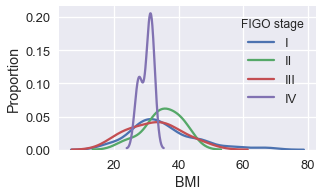

In [6]:
sns.set(style='darkgrid', context="talk")
NUM_COLORS = 12

figoHist = sns.FacetGrid(figo_stage_bmi, hue="FIGO_stage", legend_out=False, aspect=1.5)
figoHist = figoHist.map(sns.kdeplot, "BMI").add_legend(title="FIGO stage")
figoHist.set(ylabel='Proportion')
plt.show()

<b>Finally, we can use a box plot to analyze the data and see if there seems to be any overall correlation between FIGO stage and BMI. In this example, we add a strip plot over the box plot to visualize the underlying data.</b>

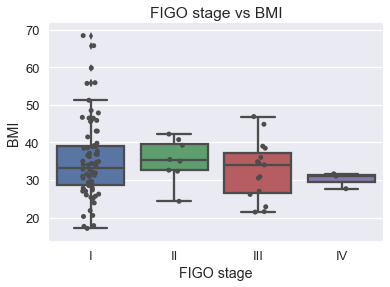

In [7]:
figoStrip = sns.boxplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI")
figoStrip = sns.stripplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI", jitter=True, color=".3")
figoStrip.set(xlabel = "FIGO stage")
figoStrip.set_title("FIGO stage vs BMI")
plt.show()

# fig, (ax1, ax2) = plt.subplots(ncols=2)
figoStrip = sns.boxplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI", ax=ax1)
sns.stripplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI", jitter=True, color=".3", ax=ax1)
figoStrip.set(xlabel = "FIGO stage")

#figoHist = sns.FacetGrid(figo_stage_bmi, hue="FIGO_stage", legend_out=False, height=5, aspect=1.5)
#figoHist = figoHist.map(sns.kdeplot, "BMI").add_legend(title="FIGO stage")
figoHist = sns.kdeplot(data=figo_stage_bmi[['BMI']])
figoHist.set(ylabel='Proportion')
plt.show()

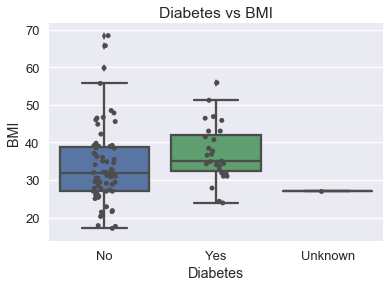

In [20]:
diabetes_tumor = CPTAC.get_clinical()[['Diabetes','BMI']]
diabStrip = sns.boxplot(data=diabetes_tumor, x="Diabetes",y="BMI")
diabStrip = sns.stripplot(data=diabetes_tumor, x="Diabetes",y="BMI", jitter=True, color = ".3")
diabStrip.set_title("Diabetes vs BMI")
plt.show()